<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [535]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [537]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [538]:
# текст запроса
query_3_1 = f'''select count(*)
           from vacancies
'''

In [539]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_16876\1114379196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [540]:
# текст запроса
query_3_2 = f'''select count(*)
           from employers
'''

In [541]:
# результат запроса
df_emp = pd.read_sql_query(query_3_2, connection)
df_emp

C:\Users\User\AppData\Local\Temp\ipykernel_16876\3476340068.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_emp = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [542]:
# текст запроса
query_3_3 = f'''select count(*)
           from areas
'''

In [543]:
# результат запроса
df_ar = pd.read_sql_query(query_3_3, connection)
df_ar

C:\Users\User\AppData\Local\Temp\ipykernel_16876\2265350440.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ar = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [544]:
# текст запроса
query_3_4 = f'''select count(*)
           from industries
'''

In [545]:
# результат запроса
df_ind = pd.read_sql_query(query_3_4, connection)
df_ind

C:\Users\User\AppData\Local\Temp\ipykernel_16876\2791081979.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ind = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

# Выводы по предварительному анализу данных

* База содержит 49197 вакансий, информация о которых содержится в таблице vacancies.
* Информация о работодателях содержится в таблице employers, количество работодателей 23501.
* Всего регионов 1362, информация о регионах содержится в таблице areas.
* Сфер деятельности по вакансиям 294, информация о которых содержится в таблице industries.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [546]:
# текст запроса
query_4_1 = f'''select count(v.id) cnt, a.name area
           from vacancies v
           join areas a on a.id = v.area_id
           group by a.name
           order by cnt desc
'''

In [547]:
# результат запроса
df_v_a = pd.read_sql_query(query_4_1, connection)
df_v_a

C:\Users\User\AppData\Local\Temp\ipykernel_16876\1740211356.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_v_a = pd.read_sql_query(query_4_1, connection)


,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [548]:
# текст запроса
query_4_2 = f'''select count(*) cnt
           from vacancies
           where salary_from is not Null or salary_to is not Null
'''

In [549]:
# результат запроса
df_v_s = pd.read_sql_query(query_4_2, connection)
df_v_s

C:\Users\User\AppData\Local\Temp\ipykernel_16876\2469374802.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_v_s = pd.read_sql_query(query_4_2, connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [550]:
# текст запроса
query_4_3 = f'''select round(AVG(salary_from)) avg_from,
                       round(AVG(salary_to)) avg_to
           from vacancies
'''

In [551]:
# результат запроса
df_avg_s = pd.read_sql_query(query_4_3, connection)
df_avg_s

C:\Users\User\AppData\Local\Temp\ipykernel_16876\3157559052.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_s = pd.read_sql_query(query_4_3, connection)


,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [552]:
# текст запроса
query_4_4 = f'''select count(*) cnt,
                       schedule,
                       employment
           from vacancies
           group by schedule, employment
           order by cnt desc
'''

In [553]:
# результат запроса
df_v_se = pd.read_sql_query(query_4_4, connection)
df_v_se

C:\Users\User\AppData\Local\Temp\ipykernel_16876\1731705713.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_v_se = pd.read_sql_query(query_4_4, connection)


,cnt,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [554]:
# текст запроса
query_4_5 = f'''select count(*) cnt,
                       experience
           from vacancies
           group by experience
           order by cnt
'''

In [555]:
# результат запроса
df_v_ex = pd.read_sql_query(query_4_5, connection)
df_v_ex

C:\Users\User\AppData\Local\Temp\ipykernel_16876\729577369.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_v_ex = pd.read_sql_query(query_4_5, connection)


,cnt,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

# Выводы по детальному анализу вакансий

* Наибольшее количество вакансий наблюдается в Москве (5333) и Санкт-Петербурге (2851), на третьем месте Минск. Это связано с большим количеством населения в вышеперечисленных городах и соотсветственно большим количеством предложений по работе.
* 24073 вакансии содержат данные о нижней или верхней границе зарплатной вилки (это составляе 48,9% от всего количества вакинсий - см. график "Соотношение количества вакансий с указанием зарплатной вилки"). Не указание границ зарплатной вилки возможно связано с определением уровня зарплаты по результатам собеседования.
* Среднее значение нижней границы зарплатной вилки равно 71065 руб., среднее значение верхней границы зарплатной вилки равно 110537 руб.
* Наибольшее количество вакансий наблюдается с полной занятостью на полный день.
* Максимально количество вакансий с требуемым опытом работы от 1 года до 3 лет, минимальное количество вакансий с требуемым опытом более 6 лет. Это может быть связано с желнием работодателя найти соискателя с минимальным опытом работы, чтобы соискатель мог как можно быстрее войти в рабочий процесс и одновременно наблюдается опасение работодателей с завышенным требованием опыта работы, чтобы увеличить количество желающих пройти собеседование и соответственно быстрее найти сотрудника на должность.

Text(0.5, 1.0, 'Соотношение количества вакансий с указанием зарплатной вилки')

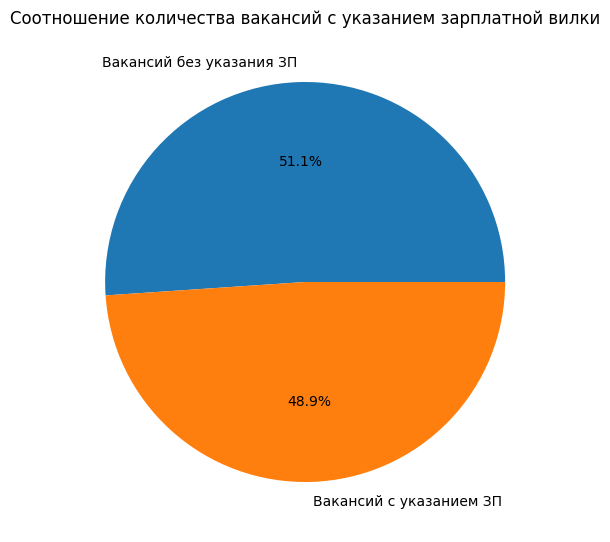

In [556]:
pie = pd.Series(
    data=[df.values-df_v_s.values, df_v_s.values],
    index=['Вакансий без указания ЗП', 'Вакансий с указанием ЗП']
    )
#pie
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    pie,
    labels=pie.index,
    autopct='%.1f%%',
);
axes.set_title('Соотношение количества вакансий с указанием зарплатной вилки')

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [557]:
# текст запроса
query_5_1 = f'''(select  e.name,
                        count(v.id) cnt
           from EMPLOYERS e
           join VACANCIES v on e.id = v.employer_id
           group by e.name
           order by cnt desc
           limit 1)
           union
           (select  e.name,
                   count(v.id) cnt
           from EMPLOYERS e
           join VACANCIES v on e.id = v.employer_id
           group by e.name
           order by cnt desc
           offset 4
           limit 1)
           order by cnt desc
'''

In [558]:
# результат запроса
df_v_em = pd.read_sql_query(query_5_1, connection)
df_v_em

C:\Users\User\AppData\Local\Temp\ipykernel_16876\2992225982.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_v_em = pd.read_sql_query(query_5_1, connection)


,name,cnt
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [559]:
# текст запроса
query_5_2 = f'''select a.name,
                       count(e.id) cnt_emp,
                       count(v.id) cnt_vcn
           from areas a
           left join EMPLOYERS e on e.area = a.id
           left join vacancies v on v.area_id = a.id
           where v.id is null
           group by a.name
           order by cnt_emp desc
           limit 1
'''

In [560]:
# результат запроса
df_a_ve = pd.read_sql_query(query_5_2, connection)
df_a_ve

C:\Users\User\AppData\Local\Temp\ipykernel_16876\175613442.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_a_ve = pd.read_sql_query(query_5_2, connection)


,name,cnt_emp,cnt_vcn
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [561]:
# текст запроса
query_5_3 = f'''select e.name,
                       count(distinct v.area_id) cnt_area
           from EMPLOYERS e
           join vacancies v on e.id = v.employer_id
           group by e.name
           order by cnt_area desc
'''

In [562]:
# результат запроса
df_e_a = pd.read_sql_query(query_5_3, connection)
df_e_a

C:\Users\User\AppData\Local\Temp\ipykernel_16876\4260250996.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_e_a = pd.read_sql_query(query_5_3, connection)


,name,cnt_area
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [563]:
# текст запроса
query_5_4 = f'''select count(e.id) cnt_emp
           from EMPLOYERS e
           left join EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
           where ei.industry_id is null
'''

In [564]:
# результат запроса
df_cnt_e = pd.read_sql_query(query_5_4, connection)
df_cnt_e

C:\Users\User\AppData\Local\Temp\ipykernel_16876\2896307707.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cnt_e = pd.read_sql_query(query_5_4, connection)


,cnt_emp
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [565]:
# текст запроса
query_5_5 = f'''select e.name,
                       count(ei.industry_id) cnt_ei
           from EMPLOYERS e
           left join EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
           group by e.name
           having count(ei.industry_id) = 4
           order by e.name
           offset 2
           limit 1
'''

In [566]:
# результат запроса
df_cnt_ei = pd.read_sql_query(query_5_5, connection)
df_cnt_ei

C:\Users\User\AppData\Local\Temp\ipykernel_16876\4231349157.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cnt_ei = pd.read_sql_query(query_5_5, connection)


,name,cnt_ei
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [567]:
# текст запроса
query_5_6 = f'''select count(e.id) cnt_emp
           from EMPLOYERS e
           left join EMPLOYERS_INDUSTRIES ei on e.id = ei.employer_id
           join INDUSTRIES i on i.id = ei.industry_id
           where i.name = 'Разработка программного обеспечения'
'''

In [568]:
# результат запроса
df_cnt_i = pd.read_sql_query(query_5_6, connection)
df_cnt_i

C:\Users\User\AppData\Local\Temp\ipykernel_16876\4144218495.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cnt_i = pd.read_sql_query(query_5_6, connection)


,cnt_emp
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [569]:
# код для получения списка городов-милионников
from bs4 import BeautifulSoup
import requests
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url, headers={'User-Agent':'Chrome/114.0.0.0'})
soup = BeautifulSoup(response.text, 'html.parser')
cities = []
for i in range(2,18):
    city = soup.select(f'#mw-content-text > div.mw-parser-output > table.standard.sortable > tbody > tr:nth-child({i}) > td:nth-child(2) > a')
    cities.append(city[0].text)
cities = tuple(cities)
cities

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [570]:
# текст запроса
query_5_7 =f'''select 
                    a.name,
                    count(v.id) cnt
                from vacancies v
                left join employers e on v.employer_id = e.id
                left join areas a on a.id = v.area_id
                where e.name = 'Яндекс' and a.name in {cities}
                group by a.name
                --order by cnt desc

                union all

                select
                    'total',
                    count(v.id)
                from vacancies v
                left join employers e on v.employer_id = e.id
                left join areas a on a.id = v.area_id
                where e.name = 'Яндекс' and a.name in {cities}
                --group by a.name
                order by 2
'''

In [571]:
# результат запроса
df_cnt_mln = pd.read_sql_query(query_5_7, connection)
df_cnt_mln

C:\Users\User\AppData\Local\Temp\ipykernel_16876\2791697641.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cnt_mln = pd.read_sql_query(query_5_7, connection)


,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

# Выводы по анализу работодателей

* По количеству вакансий лидирует компания Яндекс (1933 вакансии).
* Среди регионов, в которых нет вакансий, наибольшее количество работодателей находится в России.
* Компания Яндекс также лидирует по количеству регионов, в которых опубликованы вакансии.
* 8419 работодателей не указали сферу деятельности.
* В города-миллионниках у компании Яндекс размещено всего 485 вакансий.


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [572]:
# текст запроса
query_6_1 = f'''select count(v.id) cnt
           from VACANCIES v
           where v.name ilike '%data%' or v.name ilike '%данн%'
'''

In [573]:
# результат запроса
df_cnt_d = pd.read_sql_query(query_6_1, connection)
df_cnt_d

C:\Users\User\AppData\Local\Temp\ipykernel_16876\584462990.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cnt_d = pd.read_sql_query(query_6_1, connection)


,cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [574]:
# текст запроса
query_6_2 = f'''select count(v.id) cnt
           from VACANCIES v
           where (v.name ilike '%data scientist%' or 
                  v.name ilike '%data science%' or 
                  v.name ilike '%исследователь данных%' or 
                  v.name ilike '%ML%' or 
                  v.name ilike '%machine learning%' or 
                  v.name ilike '%машинн%обучен%')
                 and
                 (v.name ilike '%junior%' or v.experience = 'Нет опыта' or v.employment = 'Стажировка')
                 and 
                 v.name not ilike '%HTML%'
'''

In [575]:
# результат запроса
df_cnt_ds = pd.read_sql_query(query_6_2, connection)
df_cnt_ds

C:\Users\User\AppData\Local\Temp\ipykernel_16876\903744450.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cnt_ds = pd.read_sql_query(query_6_2, connection)


,cnt
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [576]:
# текст запроса
query_6_3 = f'''select count(v.id) cnt
           from VACANCIES v
           where (v.name ilike '%data scientist%' or 
                  v.name ilike '%data science%' or 
                  v.name ilike '%исследователь данных%' or 
                  v.name like '%ML%' or 
                  v.name ilike '%machine learning%' or 
                  v.name ilike '%машинн%обучен%')
                 and 
                 v.name not ilike '%HTML%'
                 and
                 v.key_skills IS NOT NULL
                 and
                 (v.key_skills ilike '%SQL%' or v.key_skills ilike '%postgres%')
'''

In [577]:
# результат запроса
df_cnt_dsk = pd.read_sql_query(query_6_3, connection)
df_cnt_dsk

C:\Users\User\AppData\Local\Temp\ipykernel_16876\2751350691.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cnt_dsk = pd.read_sql_query(query_6_3, connection)


,cnt
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [578]:
# текст запроса
query_6_4 = f'''select count(v.id) cnt
           from VACANCIES v
           where (v.name ilike '%data scientist%' or 
                  v.name ilike '%data science%' or 
                  v.name ilike '%исследователь данных%' or 
                  v.name like '%ML%' or 
                  v.name ilike '%machine learning%' or 
                  v.name ilike '%машинн%обучен%')
                 and 
                 v.name not ilike '%HTML%'
                 and
                 v.key_skills IS NOT NULL
                 and
                 (v.key_skills like '%Python%')
'''

In [579]:
# результат запроса
df_cnt_dsk_ptn = pd.read_sql_query(query_6_4, connection)
df_cnt_dsk_ptn

C:\Users\User\AppData\Local\Temp\ipykernel_16876\210189653.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cnt_dsk_ptn = pd.read_sql_query(query_6_4, connection)


,cnt
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [580]:
# текст запроса
query_6_5 = f'''select round(avg(length(key_skills)
             -length(replace(key_skills, CHR(9), ''))+1), 2) avg_ks
           from VACANCIES v
           where (v.name ilike '%data scientist%' or 
                  v.name ilike '%data science%' or 
                  v.name ilike '%исследователь данных%' or 
                  v.name like '%ML%' or 
                  v.name ilike '%machine learning%' or 
                  v.name ilike '%машинн%обучен%')
                 and 
                 v.name not ilike '%HTML%'
'''

In [581]:
# результат запроса
df_avg_dsk = pd.read_sql_query(query_6_5, connection)
df_avg_dsk

C:\Users\User\AppData\Local\Temp\ipykernel_16876\4244722823.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_dsk = pd.read_sql_query(query_6_5, connection)


,avg_ks
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [582]:
# текст запроса
query_6_6 = f'''select distinct
                       v.experience,
                       ROUND(AVG(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to, 0)))
           from VACANCIES v
           where (v.name ilike '%data scientist%' or 
                  v.name ilike '%data science%' or 
                  v.name ilike '%исследователь данных%' or 
                  v.name like '%ML%' or 
                  v.name ilike '%machine learning%' or 
                  v.name ilike '%машинн%обучен%')
                 and 
                 v.name not ilike '%HTML%'
                 and (v.salary_from is not Null or v.salary_to is not Null)
           group by v.experience 
'''

In [583]:
# результат запроса
df_avg_ds_sal = pd.read_sql_query(query_6_6, connection)
df_avg_ds_sal

C:\Users\User\AppData\Local\Temp\ipykernel_16876\365285759.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_ds_sal = pd.read_sql_query(query_6_6, connection)


,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

# Выводы по предметному анализу

* 1771 вакансия имеет отношение к данным (это составляет 3,6% от общего числа вакансий).
* Для начинающего Data Scietist опубликована 51 вакансия, это возможно связано пока с небольшим количеством специалистов в данной области.
* Вакансий с указанным ключевым навыком Python - 351, а вакансий с указанным ключевым навыком SQL или postgres - 201, следовательно у работодателей более востребован к соискателям навык владения Python. Это связано с растущей популярностью языка программирования Python за последние несколько лет.
* В среднем в вакансиях для DS указывают 6 ключевых навыков, поскольку специалисты данной области должны владеть обширной областью знаний в программировании, базах данных, статистике и математическом анализе. 
* С увеличением опыта работы зарплата DS растёт практически в геометрической прогрессии.


# Общий вывод по проекту

In [584]:
# составим запрос по количеству вакансий в каждой уникальной сфере деятельности и выведем топ-10
query_7_1 = f'''select distinct
                       i.name,
                       count(v.id) cnt
           from VACANCIES v 
           left join EMPLOYERS_INDUSTRIES ei on v.employer_id = ei.employer_id
           join INDUSTRIES i on i.id = ei.industry_id
           group by i.name
           order by cnt desc
           limit 10
'''

In [585]:
# результат запроса
df_cnt_ind = pd.read_sql_query(query_7_1, connection)
df_cnt_ind

C:\Users\User\AppData\Local\Temp\ipykernel_16876\537731092.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cnt_ind = pd.read_sql_query(query_7_1, connection)


,name,cnt
0,Разработка программного обеспечения,12499
1,"Системная интеграция, автоматизации технологи...",11034
2,"Интернет-компания (поисковики, платежные систе...",6413
3,Банк,2742
4,Мобильная связь,1585
5,Кадровые агентства,1143
6,Консалтинговые услуги,1137
7,Интернет-провайдер,1095
8,Розничная сеть (продуктовая),1034
9,Фиксированная связь,1028


In [586]:
# составим запрос по средней заработной плате по регионам и определим топ-5 по наибольшей ЗП и топ-5 по наименьшей ЗП
query_7_2 = f'''select distinct
                       a.name,
                       ROUND(AVG(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to, 0))) avg_salary
           from areas a
           join VACANCIES v on v.area_id = a.id
           where v.salary_from is not Null or v.salary_to is not Null
           group by a.name
           order by avg_salary desc
           limit 5
'''

In [587]:
# результат запроса
df_avg_sal_area= pd.read_sql_query(query_7_2, connection)
df_avg_sal_area

C:\Users\User\AppData\Local\Temp\ipykernel_16876\2112506473.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_sal_area= pd.read_sql_query(query_7_2, connection)


,name,avg_salary
0,Германия,452751.0
1,Болгария,324348.0
2,Испания,300000.0
3,Черногория,288589.0
4,Литва,263019.0


In [588]:
query_7_3 = f'''select distinct
                       a.name,
                       ROUND(AVG(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to, 0))) avg_salary
           from areas a
           join VACANCIES v on v.area_id = a.id
           where v.salary_from is not Null or v.salary_to is not Null
           group by a.name
           order by avg_salary
           limit 5
'''

In [589]:
# результат запроса
df_avg_sal_area_min = pd.read_sql_query(query_7_3, connection)
df_avg_sal_area_min

C:\Users\User\AppData\Local\Temp\ipykernel_16876\812710064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_sal_area_min = pd.read_sql_query(query_7_3, connection)


,name,avg_salary
0,Шахтинск,9764.0
1,Степногорск,12205.0
2,Кобрин,12389.0
3,Ош,12743.0
4,Урень,13800.0


In [590]:
connection.close()

# Подведем итог исследования

* Наиболее востребованные специалисты в области информационных технологий, большим спросом пользуются разработчики программного обеспечния (12499 вакансий), специалисты системной интеграции, автоматизации технологических процессов (11034 вакансии). Этот спрос связан с быстрым развитием IT-технологий и появления новых специальностей в этой сфере.
* Германия находится на первом месте по уровню средней ЗП, указанной в вакансиях (452751 р.), на втором месте Болгария (324348 р.), на третьем месте Испания (300000 р.). Высокий уровень ЗП в этих странах обусловлен высоким экономическим и социальным развитием этих стран.
* Самый низкий уровень средней ЗП наблюдается в городах с небольшой численностью населения (до 60 тыс. чел.) и низким экономическим и социальным уровнем  развития этих городов.